In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'/mnt/d/MSAIM/trimister-3 msaiml/NLP/NLP_labs/languvage_classification_tamil/dataset/tamilmurasu_dataset.csv')
df.sample(5)

,news_id,news_date,news_category,news_title,news_article
32454,32872,9/6/2012 2:48:04 PM,ஸ்டேட் எக்ஸ்பிரஸ்,பெல்லாரி எம்பி தொகுதியில் மறு வாக்கு எண்ணிக்கை,பெல்லாரி: கடந்த 2009ம் ஆண்டு நடைபெற்ற மக்களவை ...
39921,40396,2/19/2013 2:41:01 PM,குற்றம்,கோவையில் ஒரே நாளில் போதையில் 4 பேர் சாவு,கோவை: கோவை ஒண்டிப்புதூர் ஆர்.வி.லேஅவுட்டை சேர்...
66297,66991,12/5/2014 3:08:58 PM,தமிழகம்,பெரியபாளையம் அருகே இன்று காலை பரபரப்பு: மாநகர...,ஊத்துக்கோட்டை: பெரியபாளையம் அருகே இன்று காலை த...
65633,66320,11/24/2014 2:31:24 PM,தமிழகம்,வழக்கை எப்படி இழுத்தடிக்கலாம் என்பதற்காக ஜெயலல...,சேலம்: சேலம் தாதகாப்பட்டியில் மறைந்த முன்னாள் ...
105066,105886,4/1/2017 12:09:16 PM,தமிழகம்,புதுவை அரசியலில் பரபரப்பு: கவர்னர் சபாநாயகர் ம...,புதுச்சேரி- புதுவையில் 2016 பொதுத்தேர்தலில் கா...


In [4]:
df.dropna(inplace=True)

In [5]:
df.dtypes , df.shape

(news_id           int64
 news_date        object
 news_category    object
 news_title       object
 news_article     object
 dtype: object,
 (126746, 5))

Exploratory Data Analysis

In [6]:
import seaborn as sns
import pandasql as ps

In [7]:
cat_df = ps.sqldf("select news_category,count(news_category) as Count from df group by news_category")

In [8]:
cat_df['id'] = cat_df.index + 1
cat_df

,news_category,Count,id
0,ஆன்மீகம்,406,1
1,இந்தியா,16935,2
2,உலகம்,7477,3
3,கல்வி,240,4
4,குற்றம்,16290,5
5,சினிமா(ரீல்மா),9248,6
6,தமிழகம்,53333,7
7,தலையங்கம்,1535,8
8,தொழில்,68,9
9,மருத்துவம்,544,10


Text(0.5, 1.0, 'News Category Distribution')

/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 2950 (\N{TAMIL LETTER AA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Matplotlib currently does not support Tamil natively.
  func(*args, **kwargs)
/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 2985 (\N{TAMIL LETTER NNNA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 3021 (\N{TAMIL SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 2990 (\N{TAMIL LETTER MA}) missing from font(s) DejaVu Sans.
  func(*args,

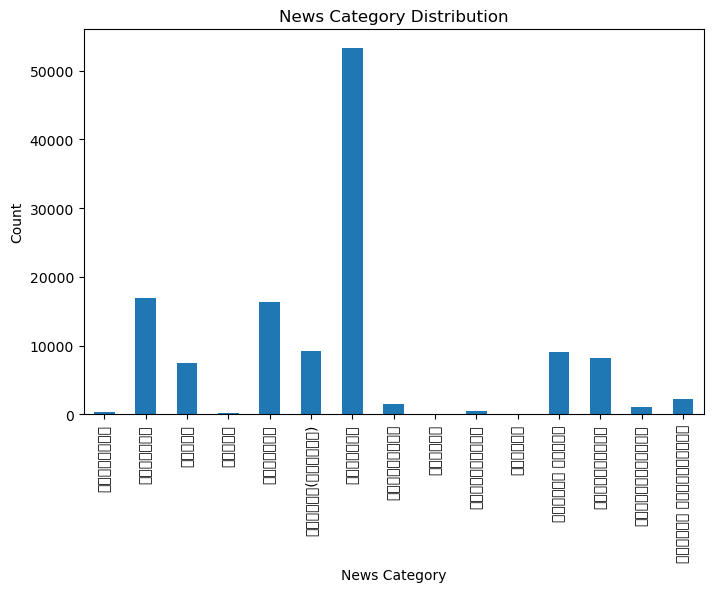

In [9]:
import matplotlib.pyplot as plt
plt = cat_df.plot(x='news_category', y='Count', kind='bar', legend=False, figsize=(8, 5))
plt.set_xlabel('News Category')
plt.set_ylabel('Count')
plt.set_title('News Category Distribution')

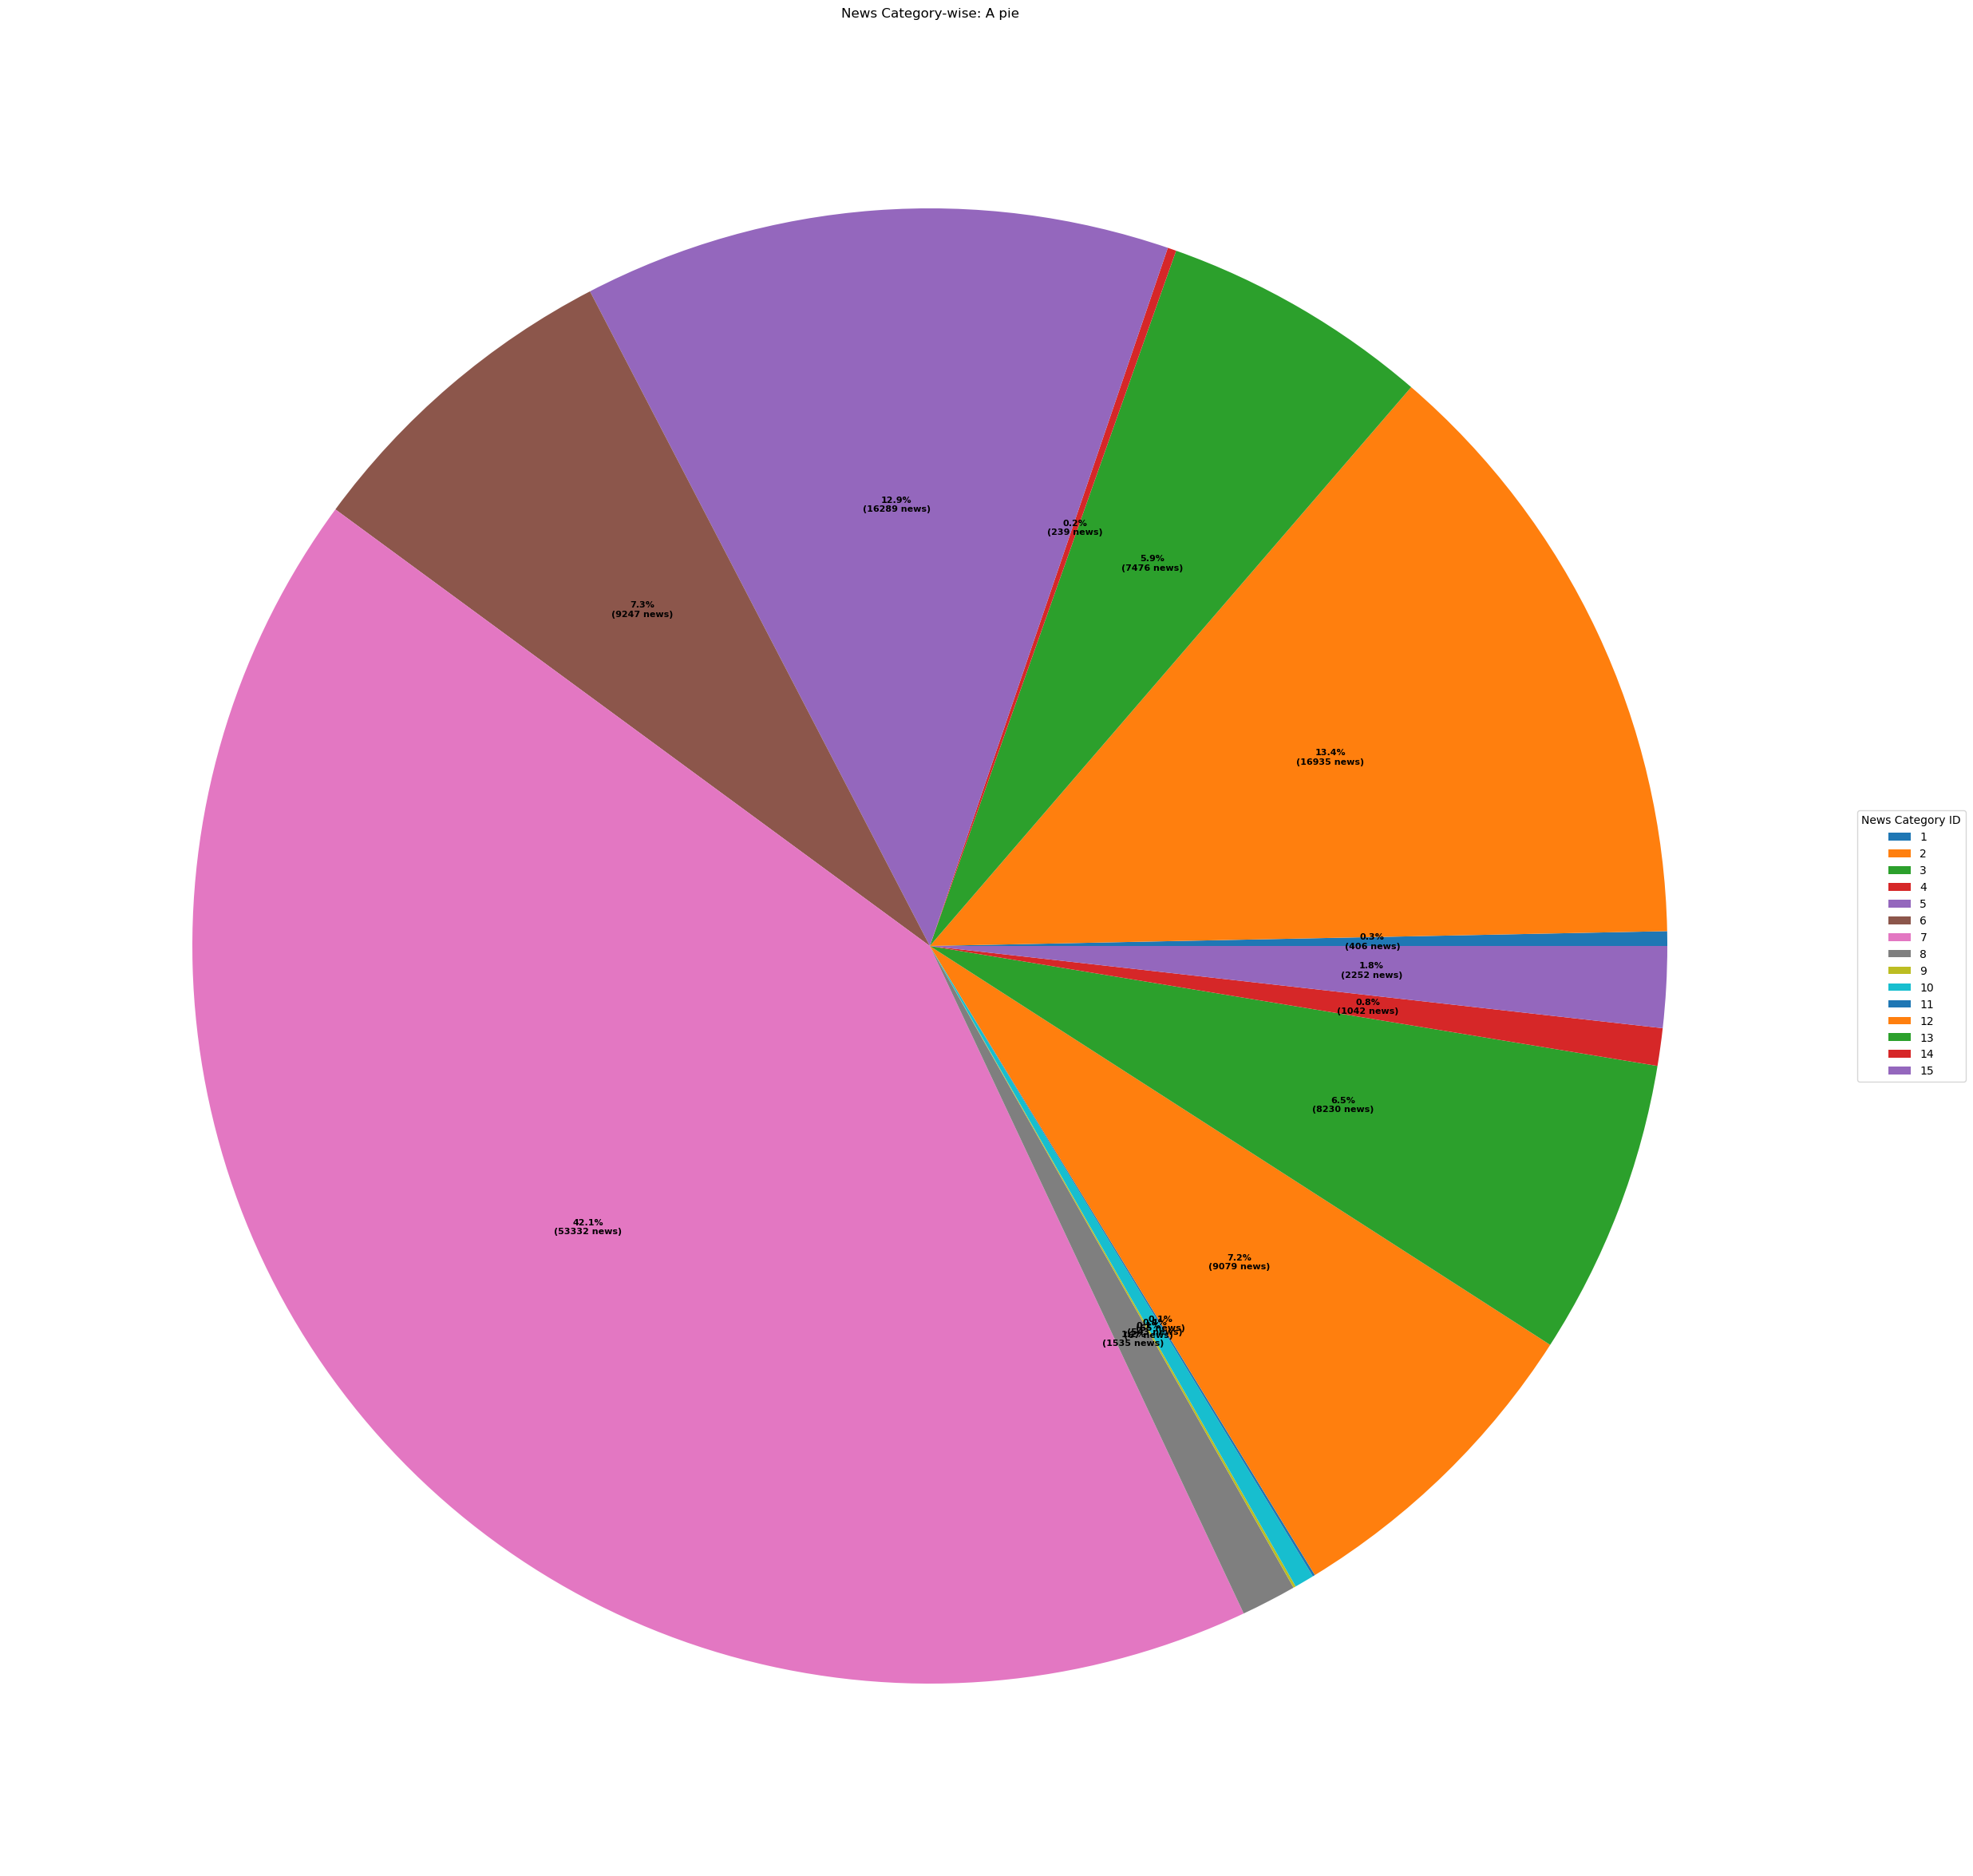

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 30), subplot_kw=dict(aspect="equal"))

tdata = cat_df['Count'].tolist()
name = cat_df['id'].tolist()



def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} news)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(tdata, autopct=lambda pct: func(pct, tdata),
                                  textprops=dict(color="black"))

ax.legend(wedges, name,
          title="News Category ID",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("News Category-wise: A pie")

plt.show()


In [11]:
stopwords=['அங்கு',
 'அங்கே',
 'அடுத்த',
 'அதனால்',
 'அதன்',
 'அதற்கு',
 'அதிக',
 'அதில்',
 'அது',
 'அதே',
 'அதை',
 'அந்த',
 'அந்தக்',
 'அந்தப்',
 'அன்று',
 'அல்லது',
 'அவன்',
 'அவரது',
 'அவர்',
 'அவர்கள்',
 'அவள்',
 'அவை',
 'ஆகிய',
 'ஆகியோர்',
 'ஆகும்',
 'இங்கு',
 'இங்கே',
 'இடத்தில்',
 'இடம்',
 'இதனால்',
 'இதனை',
 'இதன்',
 'இதற்கு',
 'இதில்',
 'இது',
 'இதை',
 'இந்த',
 'இந்தக்',
 'இந்தத்',
 'இந்தப்',
 'இன்னும்',
 'இப்போது',
 'இரு',
 'இருக்கும்',
 'இருந்த',
 'இருந்தது',
 'இருந்து',
 'இவர்',
 'இவை',
 'உன்',
 'உள்ள',
 'உள்ளது',
 'உள்ளன',
 'எந்த',
 'என',
 'எனக்',
 'எனக்கு',
 'எனப்படும்',
 'எனவும்',
 'எனவே',
 'எனினும்',
 'எனும்',
 'என்',
 'என்ன',
 'என்னும்',
 'என்பது',
 'என்பதை',
 'என்ற',
 'என்று',
 'என்றும்',
 'எல்லாம்',
 'ஏன்',
 'ஒரு',
 'ஒரே',
 'ஓர்',
 'கொண்ட',
 'கொண்டு',
 'கொள்ள',
 'சற்று',
 'சிறு',
 'சில',
 'சேர்ந்த',
 'தனது',
 'தன்',
 'தவிர',
 'தான்',
 'நான்',
 'நாம்',
 'நீ',
 'பற்றி',
 'பற்றிய',
 'பல',
 'பலரும்',
 'பல்வேறு',
 'பின்',
 'பின்னர்',
 'பிற',
 'பிறகு',
 'பெரும்',
 'பேர்',
 'போது',
 'போன்ற',
 'போல',
 'போல்',
 'மட்டுமே',
 'மட்டும்',
 'மற்ற',
 'மற்றும்',
 'மிக',
 'மிகவும்',
 'மீது',
 'முதல்',
 'முறை',
 'மேலும்',
 'மேல்',
 'யார்',
 'வந்த',
 'வந்து',
 'வரும்',
 'வரை',
 'வரையில்',
 'விட',
 'விட்டு',
 'வேண்டும்',
 'வேறு']
stopwords[:5]


['அங்கு', 'அங்கே', 'அடுத்த', 'அதனால்', 'அதன்']

In [12]:
df = df[['news_category','news_title']]

df = ps.sqldf("select * from df where news_category='ஆன்மீகம்' or news_category='கல்வி' or news_category='மருத்துவம்' or news_category='விளையாட்டு' or news_category='வேலைவாய்ப்பு' ")
df.head()


,news_category,news_title
0,விளையாட்டு,ஆஷஸ் டெஸ்ட் இங்கிலாந்து 644 ரன் குவிப்பு
1,ஆன்மீகம்,காக்க காக்க.. கனகவேல் காக்க (சூரசம்ஹாரம்)
2,ஆன்மீகம்,வைகுண்ட ஏகாதசி....
3,ஆன்மீகம்,கிரகங்கள் அருளும் உயர்கல்வி யோகம்
4,விளையாட்டு,நியூசி.-பாக். டெஸ்ட் நாளை துவக்கம்


In [13]:
df['news_category'].unique()

array(['விளையாட்டு', 'ஆன்மீகம்', 'கல்வி', 'வேலைவாய்ப்பு', 'மருத்துவம்'],
      dtype=object)

In [14]:
def remove_punctuation(title):
    punc = '!()-[]{};:\'"\,<>/?@#$%^&*_~\'0123456789+abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ' 
    for ele in title:  
        if ele in punc:  
            title = title.replace(ele, "")
    return title

<>:2: SyntaxWarning: invalid escape sequence '\,'
<>:2: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_21959/1453879392.py:2: SyntaxWarning: invalid escape sequence '\,'
  punc = '!()-[]{};:\'"\,<>/?@#$%^&*_~\'0123456789+abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'


In [15]:
for i in range(df['news_title'].count()):
    df['news_title'][i] = remove_punctuation(df['news_title'][i])
    
df.head()

/tmp/ipykernel_21959/3087201803.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['news_title'][i] = remove_punctuation(df['news_title'][i])


,news_category,news_title
0,விளையாட்டு,ஆஷஸ் டெஸ்ட் இங்கிலாந்து ரன் குவிப்பு
1,ஆன்மீகம்,காக்க காக்க.. கனகவேல் காக்க சூரசம்ஹாரம்
2,ஆன்மீகம்,வைகுண்ட ஏகாதசி....
3,ஆன்மீகம்,கிரகங்கள் அருளும் உயர்கல்வி யோகம்
4,விளையாட்டு,நியூசி.பாக். டெஸ்ட் நாளை துவக்கம்


In [16]:
def remove_whitespace(text): 
    return  " ".join(text.split()) 
  
input_str = "   ஆஷஸ்    டெஸ்ட்       இங்கிலாந்து ரன்      குவிப்பு"
remove_whitespace(input_str) 

'ஆஷஸ் டெஸ்ட் இங்கிலாந்து ரன் குவிப்பு'

In [17]:

from indicnlp.tokenize import indic_tokenize



# Tokenization
indic_string = 'புத்துணர்ச்சியான சுவாசம் மற்றும் பளபளப்பான பற்கள் தங்களின் தோற்றத்தை நிர்ணயிக்கிறது'
print('Input String: {}'.format(indic_string))
print('Tokens: ')
for t in indic_tokenize.trivial_tokenize(indic_string):
        print(t)

Input String: புத்துணர்ச்சியான சுவாசம் மற்றும் பளபளப்பான பற்கள் தங்களின் தோற்றத்தை நிர்ணயிக்கிறது
Tokens: 
புத்துணர்ச்சியான
சுவாசம்
மற்றும்
பளபளப்பான
பற்கள்
தங்களின்
தோற்றத்தை
நிர்ணயிக்கிறது


In [18]:
from indicnlp.transliterate.unicode_transliterate import UnicodeIndicTransliterator

# Telugu Text
for i in df['news_category'].unique():
    text = i
    converted_text = UnicodeIndicTransliterator.transliterate(text, "ta", "hi")
    print("Original Text:", text)
    print("Converted Text:", converted_text)
    
    




Original Text: விளையாட்டு
Converted Text: विळैयाट्टु
Original Text: ஆன்மீகம்
Converted Text: आऩ्मीकम्
Original Text: கல்வி
Converted Text: कल्वि
Original Text: வேலைவாய்ப்பு
Converted Text: वेलैवाय्प्पु
Original Text: மருத்துவம்
Converted Text: मरुत्तुवम्


In [19]:
df['news_title'] = df['news_title'].apply(lambda x: remove_punctuation(x))
df['news_title'] = df['news_title'].apply(lambda x: remove_whitespace(x))


In [20]:
df.sample(5)

,news_category,news_title
5460,விளையாட்டு,உலககோப்பை அரையிறுதி இலங்கை வெ. இ.நாளை மோதல்
2436,வேலைவாய்ப்பு,ரெக்ருட்மென்ட் செய்திகள்
8006,விளையாட்டு,இறுதி போட்டி வாய்ப்பை தக்க வைக்குமா இலங்கை இந்...
1705,விளையாட்டு,டைமிங் ஷாட்
884,விளையாட்டு,டுடே ஸ்பெஷல்


In [21]:
# Label Encoding for Categories
category_mapping = {cat: idx for idx, cat in enumerate(df["news_category"].unique())}


In [22]:
df["label"] = df["news_category"].map(category_mapping)

In [23]:
import fastai, torch
fastai.__version__ , torch.__version__

('2.7.18', '2.5.1+cu124')

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["news_title"], df["label"], test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
# TF-IDF Feature Extraction
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), analyzer='char') 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluation
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1689
           1       0.95      0.73      0.83        78
           2       0.96      0.45      0.61        51
           3       0.95      0.96      0.95       172
           4       0.92      0.80      0.85       103

    accuracy                           0.96      2093
   macro avg       0.95      0.79      0.85      2093
weighted avg       0.96      0.96      0.96      2093

SVM Accuracy: 0.9603440038222647


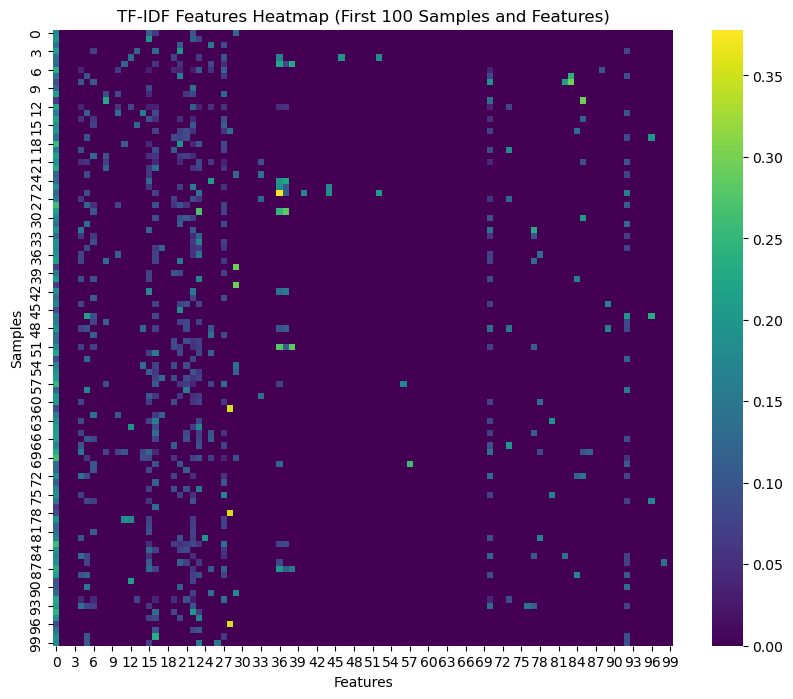

In [26]:
import seaborn as sns

import matplotlib.pyplot as plt

# Convert the sparse matrix to a dense format for visualization
X_train_tfidf_dense = X_train_tfidf.todense()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_tfidf_dense[:100, :100], cmap='viridis')
plt.title('TF-IDF Features Heatmap (First 100 Samples and Features)')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

2025-02-25 10:12:53.295276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740478373.501678   21959 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740478373.548814   21959 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-25 10:12:53.973170: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
Tokenizer = Tokenizer()
Tokenizer.fit_on_texts(X_train)
X_train_seq = Tokenizer.texts_to_sequences(X_train)

X_test_seq = Tokenizer.texts_to_sequences(X_test)
print(X_train_seq[0])

[1705, 940, 1207, 548, 2873, 514, 26]


In [29]:
max_length = max(len(seq) for seq in X_train_seq)  # Max sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [30]:
vocab_size = len(Tokenizer.word_index) + 1

In [31]:
len(category_mapping)

5

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Assuming X_train_pad, X_test_pad are already tokenized and padded
# Convert labels to numeric values
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)  
y_test_enc = label_encoder.transform(y_test)  

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_pad, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_pad, dtype=torch.long)
y_train_tensor = torch.tensor(y_train_enc, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_enc, dtype=torch.long)

# Create Datasets & DataLoaders
batch_size = 4
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Define LSTM Model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=128, output_dim=5):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]  # Take last time-step output
        x = self.fc(lstm_out)
        return self.softmax(x)

# Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMClassifier(vocab_size=len(Tokenizer.word_index) + 1, output_dim=5).to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")

# Evaluation
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())



Epoch 1/30, Loss: 1.1247
Epoch 2/30, Loss: 1.1232
Epoch 3/30, Loss: 1.1235
Epoch 4/30, Loss: 1.1232
Epoch 5/30, Loss: 1.1232
Epoch 6/30, Loss: 1.1232
Epoch 7/30, Loss: 1.1232
Epoch 8/30, Loss: 1.1232
Epoch 9/30, Loss: 1.1232
Epoch 10/30, Loss: 1.1235
Epoch 11/30, Loss: 1.1232
Epoch 12/30, Loss: 1.1232
Epoch 13/30, Loss: 1.1232
Epoch 14/30, Loss: 1.1232
Epoch 15/30, Loss: 1.1235
Epoch 16/30, Loss: 1.1232
Epoch 17/30, Loss: 1.1232
Epoch 18/30, Loss: 1.1232
Epoch 19/30, Loss: 1.1232
Epoch 20/30, Loss: 1.1232
Epoch 21/30, Loss: 1.1232
Epoch 22/30, Loss: 1.1232
Epoch 23/30, Loss: 1.1232
Epoch 24/30, Loss: 1.1232
Epoch 25/30, Loss: 1.1232
Epoch 26/30, Loss: 1.1232
Epoch 27/30, Loss: 1.1232
Epoch 28/30, Loss: 1.1235
Epoch 29/30, Loss: 1.1235
Epoch 30/30, Loss: 1.1232
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1689
           1       0.00      0.00      0.00        78
           2       0.00      0.00    

/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [36]:
# Print Classification Report
print("LSTM Classification Report:\n", classification_report(all_labels, all_preds))
print("LSTM Accuracy:", accuracy_score(all_labels, all_preds))


LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1689
           1       0.00      0.00      0.00        78
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00       172
           4       0.00      0.00      0.00       103

    accuracy                           0.81      2093
   macro avg       0.16      0.20      0.18      2093
weighted avg       0.65      0.81      0.72      2093

LSTM Accuracy: 0.8069756330625896


/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo